<a href="https://colab.research.google.com/github/DivyaSwamy/transformers_tutorials/blob/main/transformers_computervision_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### ***Author - Divya Swaminathan***
##### ***Date - July 2025***
---


### **Goals** -

1.   Basic exploration of image classification and object segmentation using computer vision pretrained models from the transformers library and hugging face repo.
2.   Where do these default models stumble?
3. For fun - how would the default models perform on biological/fluorescence images ?
---

### **Outcomes**-

By the end of this tutorial one would have ->

1.   Learn how to spin up a tranformer pipeline with a default model for computer vision (classification & segmentation) tasks.
2.   Learn how to spin up a tranformer pipeline with a chosen model for computer vision (classification & segmentation) tasks.
3. Understood the limitations out of the box model present.



---



#### To get started with transformers first install the transformers library.




In [1]:
%%capture
%pip install transformers[sentencepiece]

Let's import other useful libraries as well -
opencv, skimage, urllib etc.

In [2]:

import cv2
import skimage
import urllib
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#
from PIL import Image




**Image Classification and Object segmentation are the 2 most popular tasks in conputer vision**

1.   Before we look at transormers, let's select images we will use to try out these 2 tasks.
2.   Let's also look at opening images from selected url's, for this one writes helper function - ***open_image_url***


In [3]:
def open_image_url(url):
  """
  Function takes in a url and returns image.
  """
  req = urllib.request.urlopen(url)
  arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
  img = cv2.imdecode(arr, -1) # 'Load it as it is'

  return img


I am deliberating choosing to name the image url  with it's label. Also, let's take a look at the images once we have the url's.

Ideally, the classification task should return these labels and the segmentation task should segment out the bird, horse, person , cat etc.

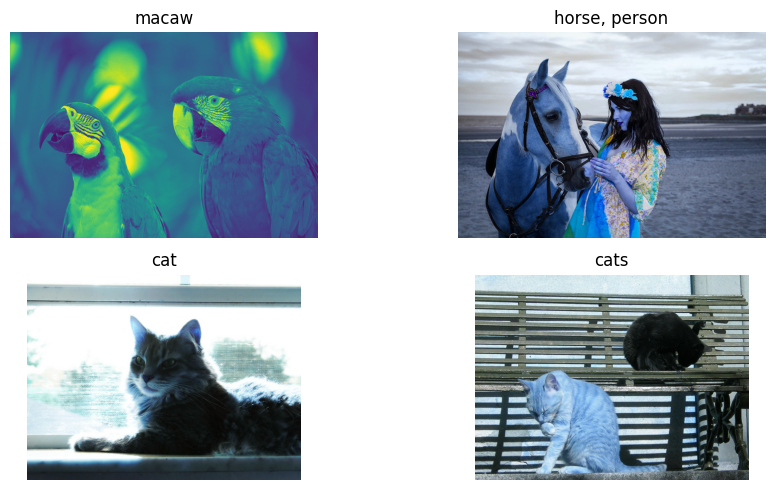

In [4]:
image_macaw = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/hub/parrots.png"
# Images from COCO dataset-
image_horse_person = "https://farm8.staticflickr.com/7282/9364821016_1fd99884c6_z.jpg"
image_cat = "https://farm4.staticflickr.com/3256/2721822227_6c11b19325_z.jpg"
image_2cats = "https://farm1.staticflickr.com/99/269374399_c03d98fc0e_z.jpg"

url_list = [image_macaw, image_horse_person, image_cat, image_2cats]
url_title = ["macaw", "horse, person", "cat", "cats"]

fig, axs = plt.subplots(2,2, figsize = (10, 5))
axs = axs.ravel()

for i in range(len(axs)):
  axs[i].imshow(open_image_url(url_list[i]))
  axs[i].set_title(url_title[i])
  axs[i].set_axis_off()

plt.tight_layout()


Now, let's get started ⛵

 ***Transformers*** -
A transformer is a deep learning architecture originally developed for processing language, now widely used in computer vision and other fields. It uses a self-attention mechanism to determine the importance of each part of the input relative to others, allowing it to model complex relationships. In vision tasks, transformers divide images into patches and analyze their interactions globally—unlike convolutional neural networks (CNNs), which focus on local features. This global context helps capture richer patterns. Transformers are highly scalable, data-efficient, and have achieved state-of-the-art results in tasks like classification, segmentation, and detection across various domains, including healthcare and autonomous systems. - courtesy ChatGPT

***pipelines***- Huggingface docs state:-
* The pipelines are a great and easy way to use models for inference. These pipelines are objects that abstract most of the complex code from the library, offering a simple API dedicated to several tasks. In the next bit of code, one lists all the tasks one can accomplish via pipelines.

***pipeline***- There are two categories of pipeline abstractions to be aware about:
* The pipeline() which is the most powerful object encapsulating all other pipelines.
* Task-specific pipelines are available for audio, computer vision, natural language processing, and multimodal tasks.








In [5]:
from transformers import pipelines

List all the different tasks a the pipeline functionality in transformer library can be used for.

In [6]:
capabilities = [task for task in pipelines.SUPPORTED_TASKS]

print('Transformers are capable of accompalishing the following tasks-')

for cap in capabilities:
  print(cap)

Transformers are capable of accompalishing the following tasks-
audio-classification
automatic-speech-recognition
text-to-audio
feature-extraction
text-classification
token-classification
question-answering
table-question-answering
visual-question-answering
document-question-answering
fill-mask
summarization
translation
text2text-generation
text-generation
zero-shot-classification
zero-shot-image-classification
zero-shot-audio-classification
image-classification
image-feature-extraction
image-segmentation
image-to-text
image-text-to-text
object-detection
zero-shot-object-detection
depth-estimation
video-classification
mask-generation
image-to-image


Image based tasks that transformers can accomplish are :-

In [7]:
image_based_tasks = [cap for cap in capabilities if cap.find('image') > -1]
print(image_based_tasks)


['zero-shot-image-classification', 'image-classification', 'image-feature-extraction', 'image-segmentation', 'image-to-text', 'image-text-to-text', 'image-to-image']


### ***Image Classification***

 * Let's test the classification task with the first macaw image.
 * It is simple to set up the classification pipeline. Specify the task and then the model. I selected microsoft's resnet-50 from Huggingface.
 * The result is impressive.





In [8]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("image-classification", model="microsoft/resnet-50")

result = pipe(image_macaw)


print('Image is classified as:-', result[0]['label'],
      'with a probability score of', result[0]['score'])

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


Image is classified as:- macaw with a probability score of 0.9999986886978149


Let's process our list of images and see the result.


In [9]:
for image in url_list:
  img = open_image_url(image)
  pil_image = Image.fromarray(img)
  result = pipe(pil_image) # Input here requires a url or a PIL image.
  #
  print('Image is classified as:-', result[0]['label'],
      'with a probability score of', result[0]['score'])

Image is classified as:- macaw with a probability score of 0.9999986886978149
Image is classified as:- muzzle with a probability score of 0.16390648484230042
Image is classified as:- tabby, tabby cat with a probability score of 0.3452478051185608
Image is classified as:- shopping basket with a probability score of 0.8304566740989685


Is it necessary to give pipeline a model?

* No. It's not.
  * Notice the default model is set to - google/.   vit-base-patch16-224 and revision 3f49326
* Yes, When in production one must specify model name and revision.

In [10]:
pipe = pipeline("image-classification")

result = pipe(image_macaw)

print('Image is classified as:-', result[0])

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


Image is classified as:- {'label': 'macaw', 'score': 0.9905233979225159}


In the following bit of code you will see, multiple labels are associated with each image and one considers the label with the highest score the classification of the images.








In [11]:
for image in url_list:
  img = open_image_url(image)
  pil_image = Image.fromarray(img)
  result = pipe(pil_image)
  for elem in result:
    print(elem)
  print('---')
  print('Image is classified as:-', result[0]['label'],
      'with a probability score of', result[0]['score'])
  print('---')

{'label': 'macaw', 'score': 0.9905233979225159}
{'label': 'African grey, African gray, Psittacus erithacus', 'score': 0.005603463854640722}
{'label': 'toucan', 'score': 0.0010569053702056408}
{'label': 'sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita', 'score': 0.0006811487837694585}
{'label': 'lorikeet', 'score': 0.0006714339251630008}
---
Image is classified as:- macaw with a probability score of 0.9905233979225159
---
{'label': 'sarong', 'score': 0.40985503792762756}
{'label': 'cloak', 'score': 0.057832978665828705}
{'label': 'maillot, tank suit', 'score': 0.035769179463386536}
{'label': 'overskirt', 'score': 0.026434598490595818}
{'label': 'gown', 'score': 0.0224055964499712}
---
Image is classified as:- sarong with a probability score of 0.40985503792762756
---
{'label': 'Egyptian cat', 'score': 0.3785083591938019}
{'label': 'tiger cat', 'score': 0.1950087547302246}
{'label': 'tabby, tabby cat', 'score': 0.18727198243141174}
{'label': 'window shade', 'score': 0.121554


***⁉ What are the limitations of this classification excercise? Are all classifications correct ?***




 ### ***Object Segmentation***



1.   Let's switch gears and try segmentation on our chosen images.
2.   I initilized a new pipeline with the segmentation task and a pretrained segmentation model.
3. Typically, segmentation models also output bounding box coordinates along with labels. I will plot the bounding box detections to show what the model is segmenting in the image.


In [12]:
segment = pipeline("object-detection",
                   model = "facebook/detr-resnet-50")

result = segment(image_macaw)

for elem in result:
  print(elem)

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


{'score': 0.9966394901275635, 'label': 'bird', 'box': {'xmin': 69, 'ymin': 171, 'xmax': 396, 'ymax': 507}}
{'score': 0.999381422996521, 'label': 'bird', 'box': {'xmin': 398, 'ymin': 105, 'xmax': 767, 'ymax': 507}}


#### Look the results over our chosen 4 images

In [13]:
for url in url_list:
  result = segment(url)
  for elem in result:
    print(elem)
  print('---')


{'score': 0.9966394901275635, 'label': 'bird', 'box': {'xmin': 69, 'ymin': 171, 'xmax': 396, 'ymax': 507}}
{'score': 0.999381422996521, 'label': 'bird', 'box': {'xmin': 398, 'ymin': 105, 'xmax': 767, 'ymax': 507}}
---
{'score': 0.989165723323822, 'label': 'horse', 'box': {'xmin': 53, 'ymin': 53, 'xmax': 305, 'ymax': 423}}
{'score': 0.9987887740135193, 'label': 'person', 'box': {'xmin': 223, 'ymin': 95, 'xmax': 440, 'ymax': 424}}
---
{'score': 0.9986321330070496, 'label': 'cat', 'box': {'xmin': 100, 'ymin': 96, 'xmax': 639, 'ymax': 424}}
{'score': 0.8120043277740479, 'label': 'bench', 'box': {'xmin': 0, 'ymin': 377, 'xmax': 639, 'ymax': 475}}
---
{'score': 0.8835538625717163, 'label': 'bench', 'box': {'xmin': 0, 'ymin': 41, 'xmax': 639, 'ymax': 279}}
{'score': 0.991411566734314, 'label': 'bench', 'box': {'xmin': 0, 'ymin': 41, 'xmax': 639, 'ymax': 466}}
{'score': 0.9993345141410828, 'label': 'cat', 'box': {'xmin': 100, 'ymin': 224, 'xmax': 450, 'ymax': 470}}
{'score': 0.995925784111023,

In [14]:
def annotate_img(image,results_dict):
  """
  Function takes in an image and results dictionary and returns annotated image.
  """
  color = [(255,0,0), (0,255,0), (120,255,0), (0,200,120),
           (0, 120, 100), (100, 100,100)]
  thickness = 2

  # Generate a deep copy of image so original stays as is.
  annotated_img = image.copy()

  i = 0
  for r in result:
    start_point = (r['box']['xmin'],r['box']['ymin'])
    end_point = (r['box']['xmax'],r['box']['ymax'])
    cv2.rectangle(annotated_img, start_point, end_point, color[i], thickness)

    i+= 1

  return annotated_img


#### Now check out helper function on single image





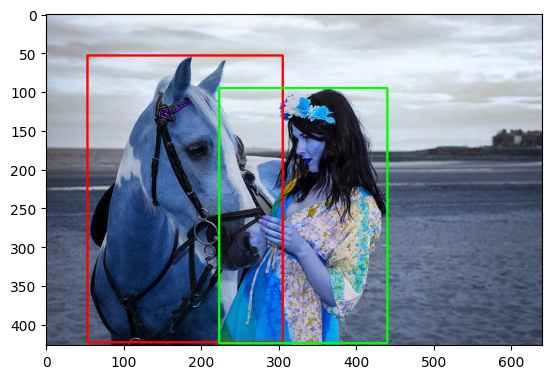

In [15]:
result = segment(image_horse_person)
annotated_img = annotate_img(open_image_url(image_horse_person), result)
plt.imshow(annotated_img)


#### With the following bit of code we can now look at all object detections in the 4 images.

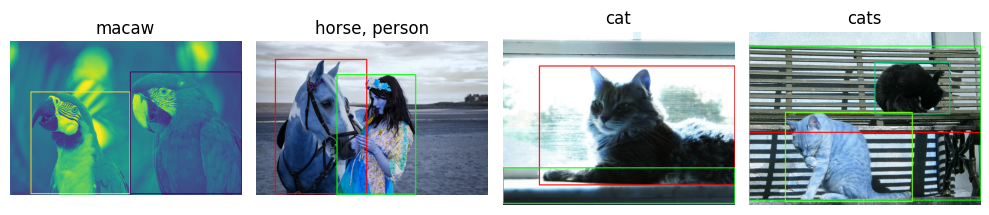

In [16]:
fig, axs = plt.subplots(1,4, figsize = (10, 5))
axs = axs.ravel()

for i in range(len(axs)):
  #
  result = segment(url_list[i])
  annotated_image = annotate_img(open_image_url(url_list[i]), result)
  #
  axs[i].imshow(annotated_image)
  axs[i].set_title(url_title[i])
  axs[i].set_axis_off()

plt.tight_layout()


###***The fun bit - will this work on fluorescence images ??***

1) Download any fluorescence image locally on your laptop \\
2) Access it in google colab \\
3) test image using ***segment*** pipeline \\


In [17]:
from google.colab import files

In [18]:
uploaded_image = files.upload()

Saving test_fluorescence_img.jpg to test_fluorescence_img (1).jpg


In [19]:
test_img = cv2.imread("test_fluorescence_img.jpg")


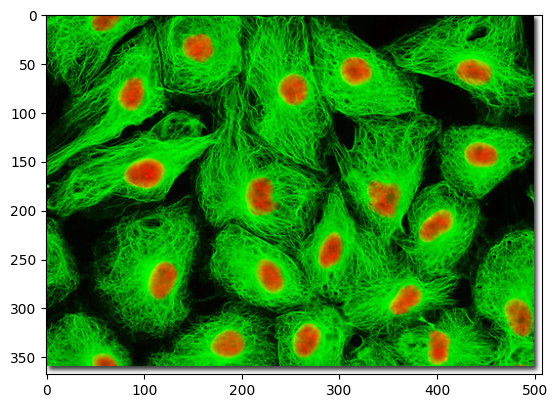

In [20]:
plt.imshow(test_img)

In [21]:
segment(test_img)

TypeError: Incorrect format used for image. Should be an url linking to an image, a base64 string, a local path, or a PIL image.

In [22]:
# PIPELINE does not work on our .jpg image --> convert to pil_image
pil_image =  Image.open("test_fluorescence_img.jpg")

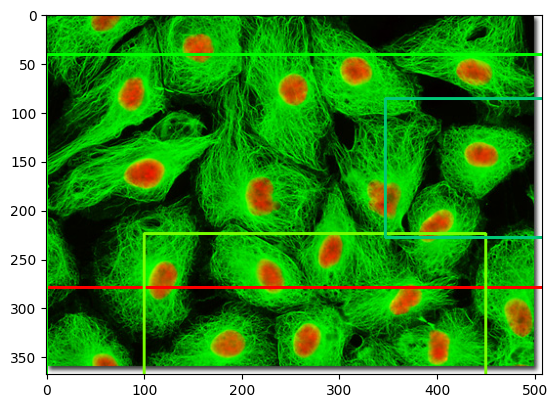

In [23]:
fl_result = segment(pil_image)
annotated_img = annotate_img(test_img, fl_result)
plt.imshow(annotated_img)

In [24]:
for elem in fl_result:
  print(elem)

{'score': 0.7762077450752258, 'label': 'teddy bear', 'box': {'xmin': 370, 'ymin': 110, 'xmax': 503, 'ymax': 322}}
{'score': 0.9094101190567017, 'label': 'teddy bear', 'box': {'xmin': 1, 'ymin': 1, 'xmax': 504, 'ymax': 362}}
{'score': 0.8216325640678406, 'label': 'teddy bear', 'box': {'xmin': 1, 'ymin': 0, 'xmax': 432, 'ymax': 358}}


**Outcome**

We see an off the shelf generalized model of segmentation fails to work on fluorescence images. \\

**The takeaway here is,for the problems one is trying to solve for one's own specific data, one needs to train an available transformer architechture of choice.**


### Congratulations !!

You have finished the tutorial. Hope you had fun 🙌